In [44]:
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv('AirPassengers.csv') 
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
date_parser = lambda dates : pd.datetime.strptime(dates, '%Y-%m')

In [5]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=date_parser)
data.head()

C:\Users\larag\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
time_series = data['#Passengers'] 
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [8]:
time_series.shape

(144,)

In [9]:
time_series.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

In [10]:
time_series[1]

118

In [11]:
time_series['1949-02-01']

118

In [12]:
time_series[datetime(1949,2,1)]

118

In [13]:
time_series['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [14]:
time_series[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [15]:
time_series['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [16]:
time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [17]:
time_series.index.min()

Timestamp('1949-01-01 00:00:00')

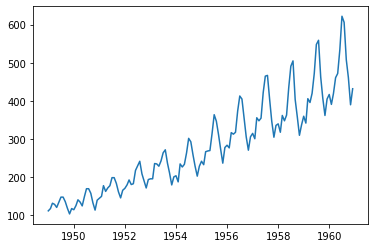

In [18]:
plt.plot(time_series)
plt.show()

In [19]:
#Resample: Convenience method for frequency conversion and resampling of time series
ts_year = time_series.resample('A').sum()
ts_year

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: #Passengers, dtype: int64

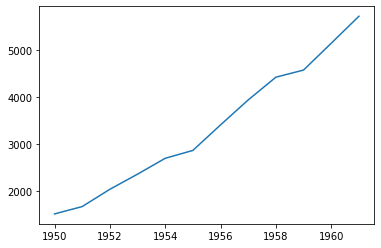

In [20]:
plt.plot(ts_year)
plt.show()

In [21]:
ts_month = time_series.groupby([lambda x: x.month]).sum()
ts_month

1     2901
2     2820
3     3242
4     3205
5     3262
6     3740
7     4216
8     4213
9     3629
10    3199
11    2794
12    3142
Name: #Passengers, dtype: int64

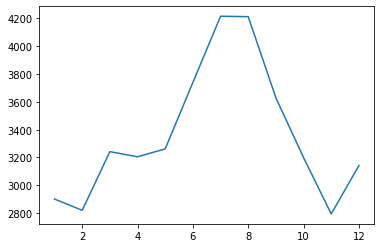

In [22]:
plt.plot(ts_month)
plt.show()

In [23]:
ts_date = time_series['1960-01-01':'1960-12-01']
ts_date

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

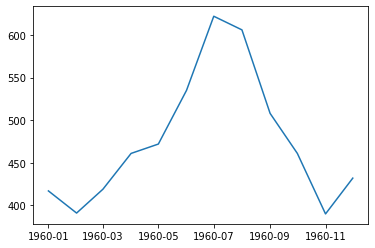

In [24]:
plt.plot(ts_date)
plt.show()

In [25]:
#An observed time series can be decomposed into three components: the trend (long term direction), the seasonal (systematic,
#calendar related movements) and the irregular (unsystematic, short term fluctuations)
decomposition = seasonal_decompose(time_series)
trend = decomposition.trend
seasonal = decomposition.seasonal
random = decomposition.resid

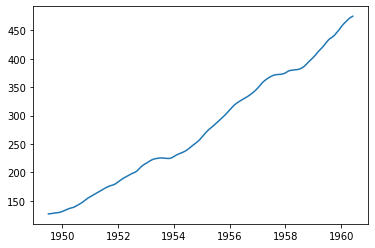

In [26]:
plt.plot(trend)
plt.show()

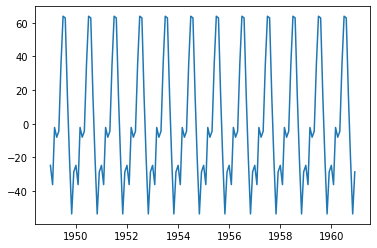

In [27]:
#Despite the fact that the number of passengers increased, the seasonality kept stable
plt.plot(seasonal)
plt.show()

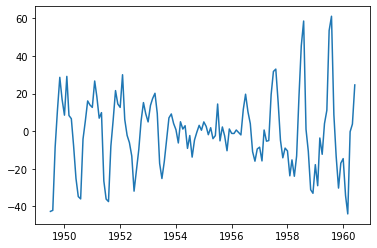

In [28]:
plt.plot(random)
plt.show()

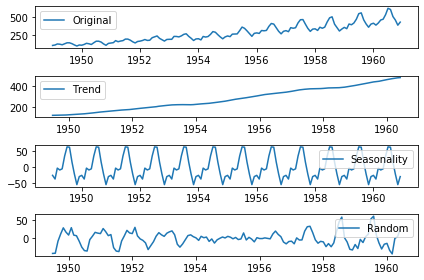

In [29]:
#Add a subplot to the current figure
plt.subplot(4, 1, 1) #nrows, ncols, index
plt.plot(time_series, label='Original')
plt.legend(loc='best')

plt.subplot(4, 1, 2) 
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4, 1, 3) 
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(random, label='Random')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [30]:
#Predictions - we are going to make predictions for the future (going beyond our data)
#Since our data is increasing over the years, we will most likely make very bad predictions from the mean
time_series.mean()

280.2986111111111

In [31]:
time_series['1960-01-01':'1960-12-01'].mean()

476.1666666666667

In [32]:
#Simple Moving Average (SMA): a moving average is a calculation to analyze data points by creating a series of averages
#of different subsets of the full data set.
sma = time_series.rolling(window=12).mean()
time_series[0:12].mean()

126.66666666666667

In [33]:
time_series[1:13].mean()

126.91666666666667

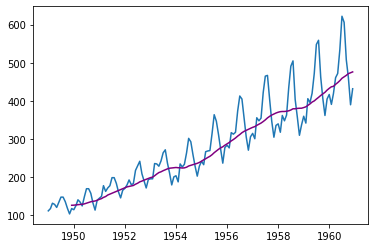

In [34]:
plt.plot(time_series)
plt.plot(sma, color='purple')
plt.show()

In [35]:
#For each record we analyze the past 12 months (upper is the upper limit - representing the month - and lower is the
#lower limit - also representing the month)
predictions = []
for i in range(1, 13):
    upper = len(sma) - i
    lower = upper - 11
    predictions.append(sma[lower:upper].mean())

#These are the predictions for the next 12 months
predictions = predictions[::-1]
predictions

[405.50757575757575,
 409.90909090909093,
 414.34848484848493,
 418.52272727272725,
 422.75757575757575,
 427.1060606060606,
 431.5,
 436.04545454545456,
 440.49999999999994,
 444.9318181818181,
 449.3787878787878,
 453.52272727272737]

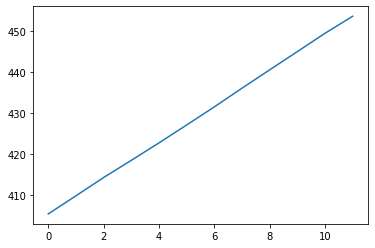

In [36]:
plt.plot(predictions)
plt.show()

In [37]:
#ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures
#a suite of different standard temporal structures in time series data. Univariate (single vector) ARIMA is a forecasting
#technique that projects the future values of a series based entirely on its own inertia. Its main application is in the
#area of short term forecasting requiring at least 40 historical data points.
#ARIMA(p, q, d) - p:number of AutoRegressive terms, q:sma number, d:non seasonal differences
model = ARIMA(time_series, order=(2,1,1)) 
trained_model = model.fit()
trained_model.summary()

C:\Users\larag\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\larag\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -675.848
Method:                       css-mle   S.D. of innovations             26.881
Date:                Thu, 11 Jun 2020   AIC                           1361.696
Time:                        00:55:12   BIC                           1376.510
Sample:                    02-01-1949   HQIC                          1367.716
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6694      0.132     20.184      0.000       2.410       2.929
ar.L1.D.#Passengers     1.1043      0.071     15.460      0.000       0.964       1.244
ar.L2.D.#Passengers    -0.5104      0.072     -7.095      0.000      -0.651      -0.369
ma.L1.D.#Passengers    -1.0000      0.029    -34.130      0.000      -1.057      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0818           -0.8883j            1.3998           -0.1094
AR.2            1.0818           +0.8883j            1.3998            0.1094
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [38]:
predictions = trained_model.forecast(steps=12)
predictions[0]

array([470.45294656, 492.56378566, 498.43895792, 494.72614921,
       488.71181901, 485.04937726, 485.15865116, 488.23256362,
       492.65526042, 497.05432   , 500.73890561, 503.64658878])

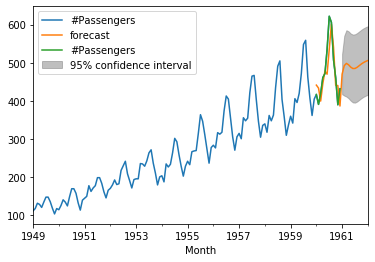

In [39]:
axis = time_series.plot()
trained_model.plot_predict('1960-01-01', '1962-01-01', ax=axis, plot_insample=True)
plt.show()